In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

In [3]:
df=pd.read_csv('energy_consumption.csv',index_col=['Datetime'],parse_dates=['Datetime'])
df.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116189 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DOM_MW  116189 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
train_size=int(len(df)*0.8)
length_df=len(df)

train=df[0:train_size]
test=df[train_size:length_df]


In [6]:
len(train)

92951

In [7]:
len(test)

23238

In [8]:
scaler=MinMaxScaler()

scaled_train=scaler.fit_transform(train)

In [9]:
time_step=50

x_train=[]
y_train=[]

for i in range(time_step,len(scaled_train)):
    x_train.append(scaled_train[i-time_step:i,0])
    y_train.append(scaled_train[i,0])

In [10]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [11]:
x_train.shape

(92901, 50)

In [17]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(92901, 50, 1)

In [12]:
lstm_model=Sequential()

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.20))

lstm_model.add(Dense(1))

c:\Users\my pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_model.compile(optimizer='adam',loss='mse')
lstm_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1377/2904 ━━━━━━━━━━━━━━━━━━━━ 1:07 44ms/step - loss: 0.0113

In [36]:
y_pred=lstm_model.predict(x_test)

y_pred=scaler.inverse_transform(y_pred)


727/727 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step


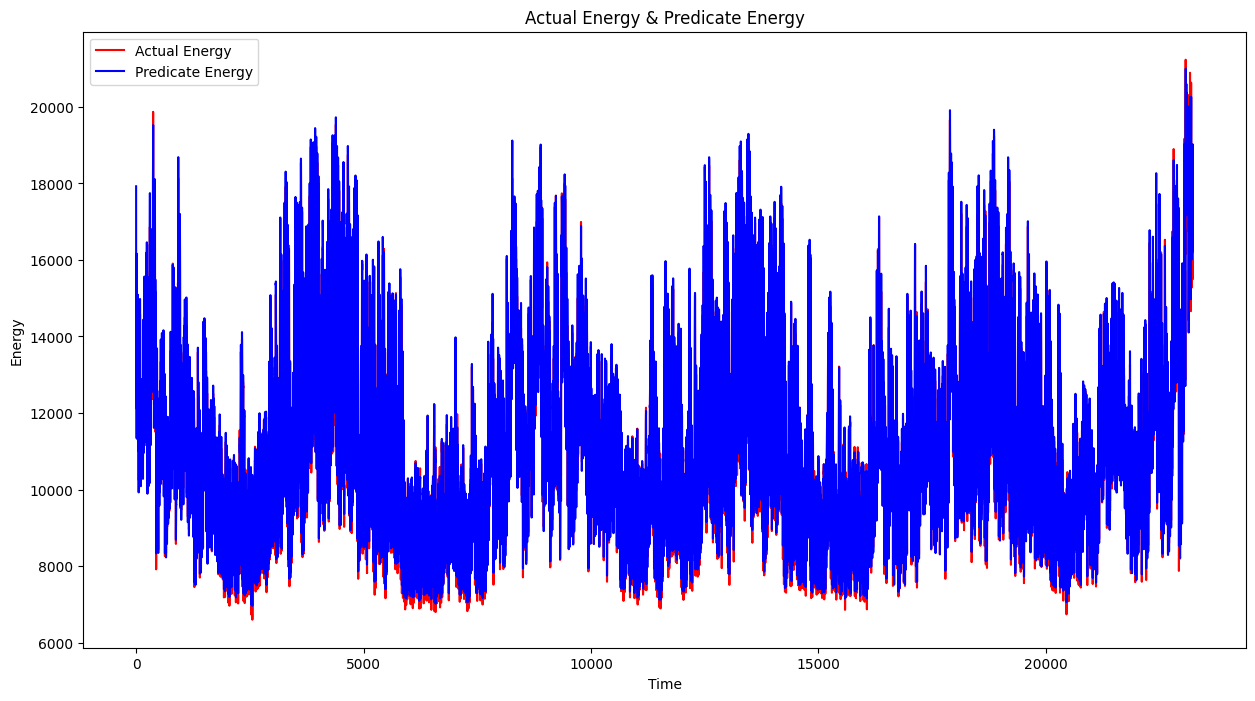

In [37]:
plt.figure(figsize=(15,8))
plt.plot(test_array,color='red',label='Actual Energy')
plt.plot(y_pred,color='blue',label='Predicate Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title("Actual Energy & Predicate Energy")
plt.legend()
plt.show()